<a href="https://colab.research.google.com/github/SachithPathiranage/Intellihack_Pandas_and_Pythons_Task_2/blob/main/Intellihack_Pandas_and_Pythons_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls 'drive/MyDrive/Intellihack_Pandas_and_Pythons_Task_2/customer_behavior_analytcis.csv'

drive/MyDrive/Intellihack_Pandas_and_Pythons_Task_2/customer_behavior_analytcis.csv


Importing necessary Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Read the dataset
df = pd.read_csv('drive/MyDrive/Intellihack_Pandas_and_Pythons_Task_2/customer_behavior_analytcis.csv')

df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [ ]:
df.tail()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997
998,29.0,39.29,9.99,16.0,11.0,CM00998


# **Exploratory Data Analysis**

In [ ]:
# Display basic information - Sanity Check
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


(999, 6)

In [ ]:
# Descriptive Statistics
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


In [ ]:
# Check for object columns to identify the data distribution
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***" * 10)

customer_id
CM00000    1
CM00671    1
CM00658    1
CM00659    1
CM00660    1
          ..
CM00338    1
CM00339    1
CM00340    1
CM00341    1
CM00998    1
Name: count, Length: 999, dtype: int64
******************************


In [ ]:
# Check for number columns to identify the data distribution
for i in df.select_dtypes(include='number').columns:
  print(df[i].value_counts())
  print("***" * 10)

total_purchases
5.0     89
7.0     68
6.0     65
4.0     62
8.0     58
3.0     52
13.0    50
9.0     50
12.0    41
10.0    39
11.0    35
14.0    32
18.0    32
21.0    28
19.0    28
22.0    28
15.0    27
20.0    27
17.0    27
16.0    26
2.0     22
23.0    19
24.0    16
25.0    12
27.0    12
26.0     8
1.0      7
29.0     6
28.0     5
30.0     4
32.0     2
0.0      2
Name: count, dtype: int64
******************************
avg_cart_value
33.29    3
27.63    3
49.51    3
37.90    2
20.39    2
        ..
46.93    1
44.89    1
11.08    1
20.62    1
39.29    1
Name: count, Length: 943, dtype: int64
******************************
total_time_spent
26.71    3
26.77    3
29.25    2
26.72    2
47.02    2
        ..
35.72    1
22.90    1
22.67    1
23.66    1
9.99     1
Name: count, Length: 953, dtype: int64
******************************
product_click
17.0    58
18.0    56
19.0    54
16.0    51
15.0    45
        ..
4.0      1
34.0     1
66.0     1
5.0      1
62.0     1
Name: count, Length: 64, d

In [ ]:
# Check for Duplicates
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


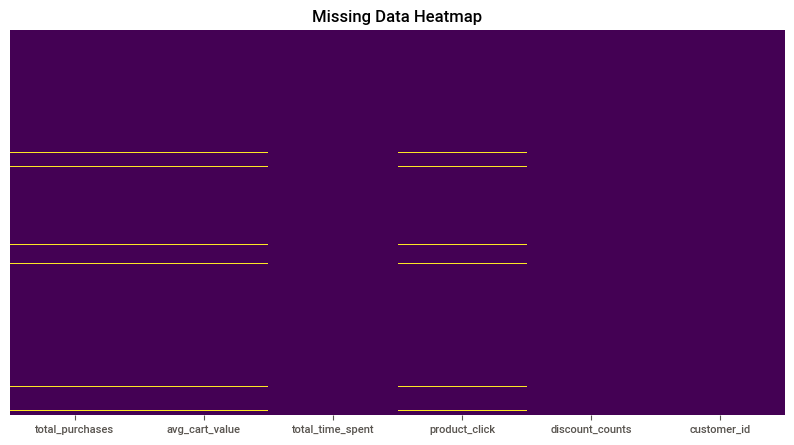

In [ ]:
# Visualizing Missing Data
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

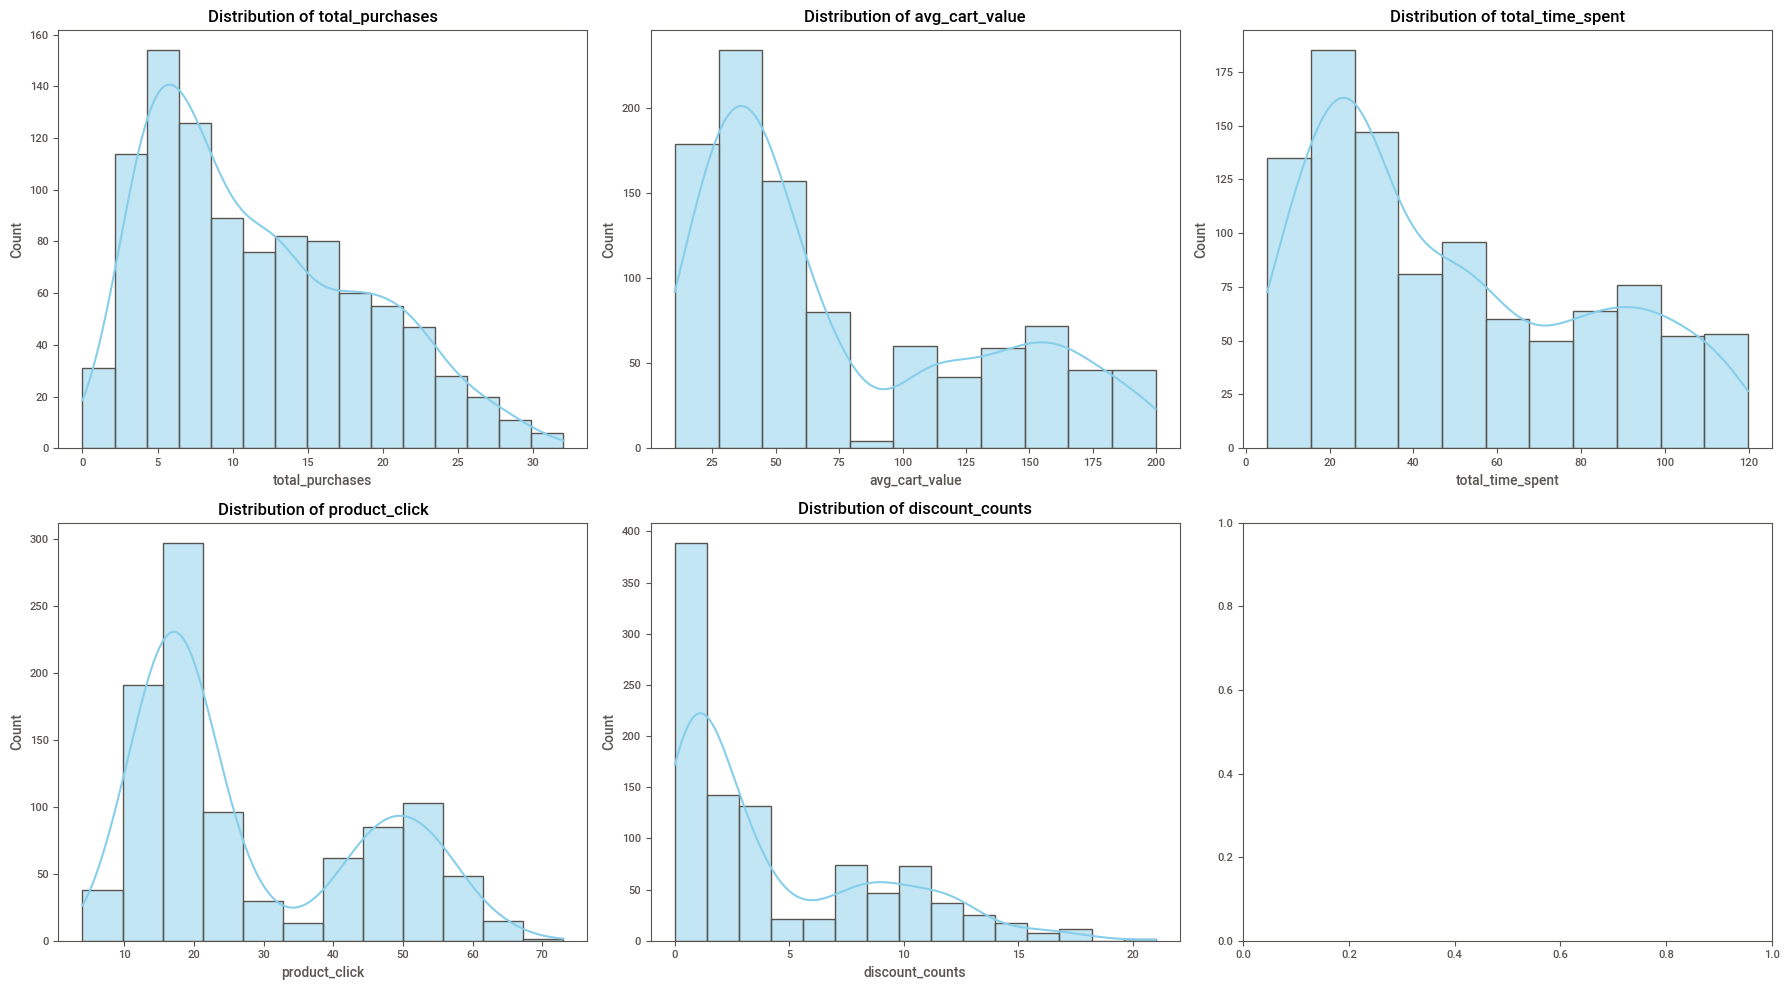

In [ ]:
# Univariate Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
columns = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(df[col], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

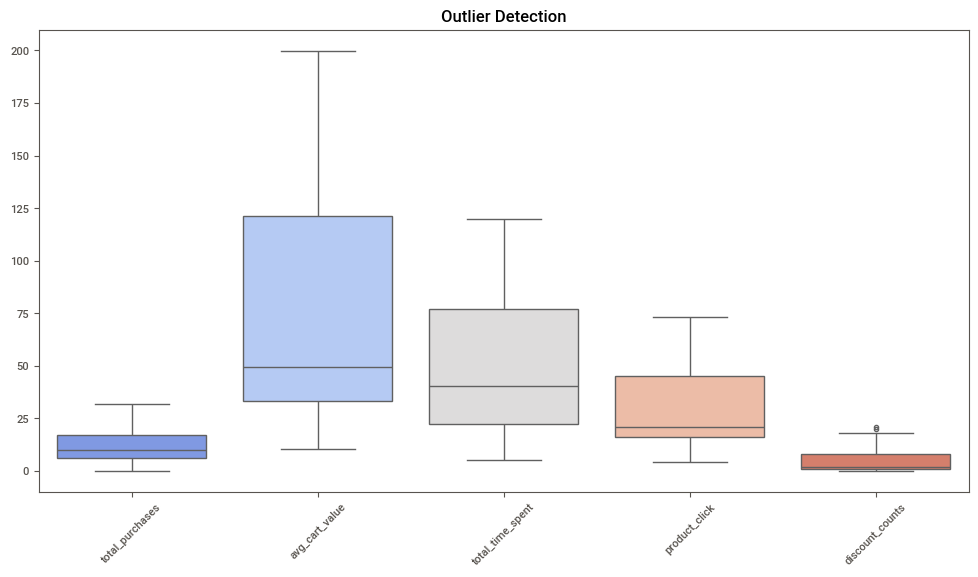

In [ ]:
# Boxplots for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns], palette="coolwarm")
plt.title("Outlier Detection")
plt.xticks(rotation=45)
plt.show()

## **Univariate Analysis**

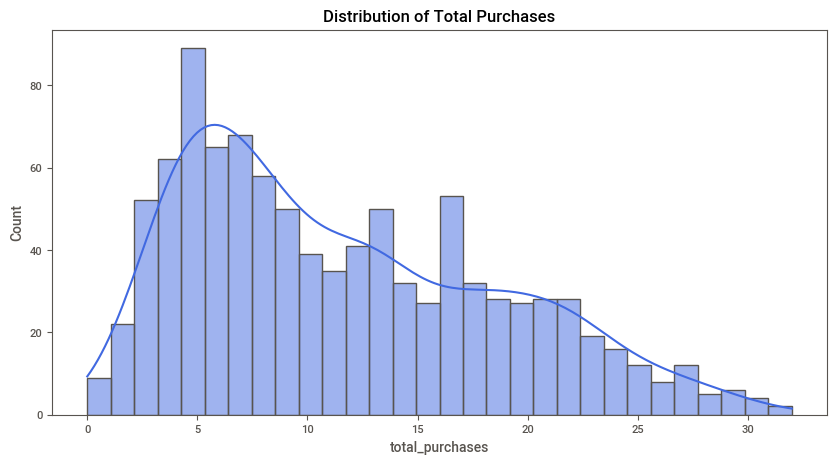

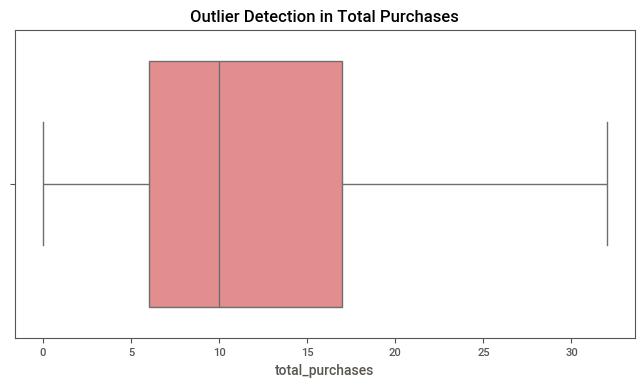

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_purchases'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of Total Purchases")
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['total_purchases'], color='lightcoral')
plt.title("Outlier Detection in Total Purchases")
plt.show()


* Right-skewed, most customers make very few purchases, meaning the platform may rely on a small number of high-value customers

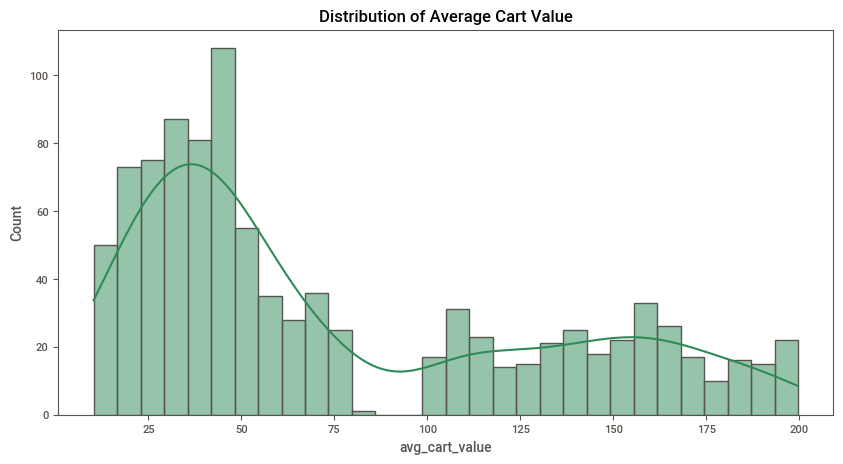

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_cart_value'], bins=30, kde=True, color='seagreen')
plt.title("Distribution of Average Cart Value")
plt.show()

* Bimodal, there may be two groups: budget buyers vs. premium buyers
* Some what right-skewed, the platform might have a lower high-value spenders driving revenue.

<ipython-input-65-91ea07a566fc>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['total_time_spent'], shade=True, color='purple')


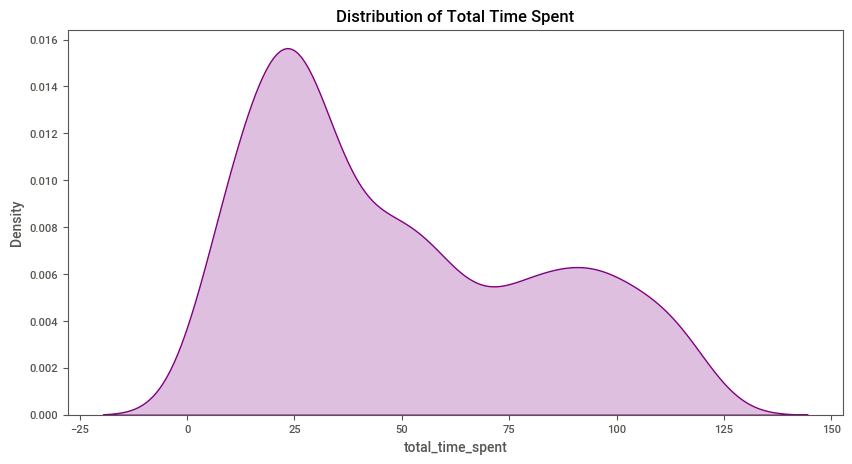

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['total_time_spent'], shade=True, color='purple')
plt.title("Distribution of Total Time Spent")
plt.show()

* If some users spend a lot of time but don’t purchase, they may need better product recommendations.
* If high time = high purchases, time spent is a key factor in revenue.

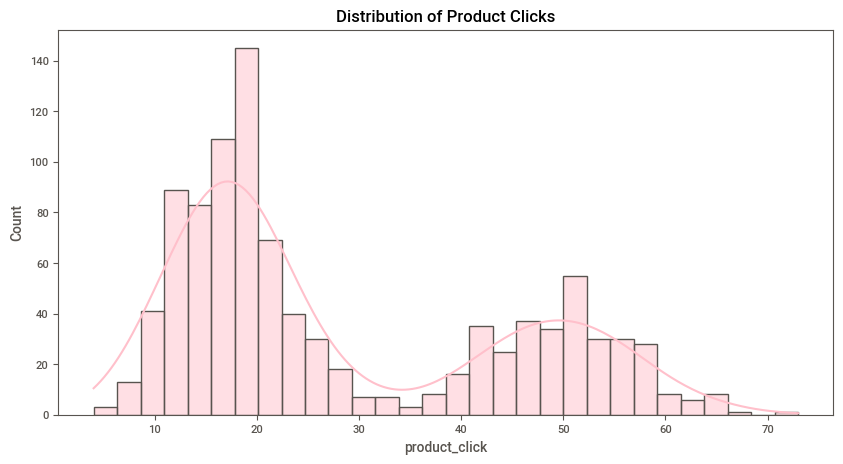

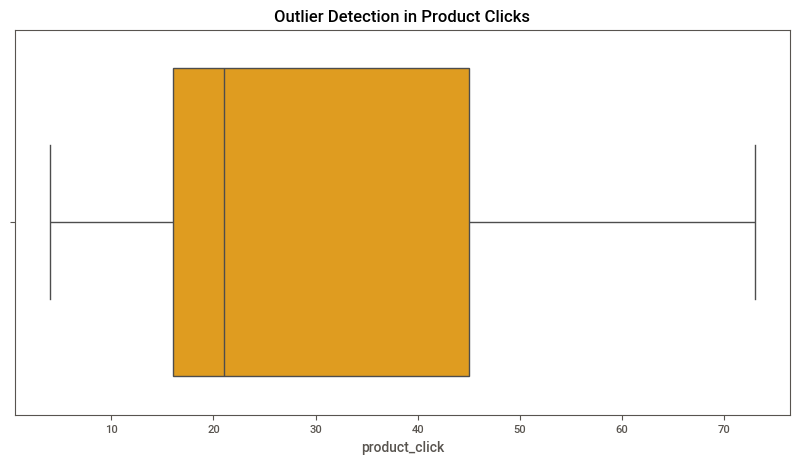

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['product_click'], bins=30, kde=True, color='pink')
plt.title("Distribution of Product Clicks")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['product_click'], color='orange')
plt.title("Outlier Detection in Product Clicks")
plt.show()

* Bimodal, there may be two groups according to the product clicking: Usually viewing less number of products, and view many products and compare each other with.
* This can be due to some people are premium buyers, who don't look much into many products, and budget buyers, who much look into many products.



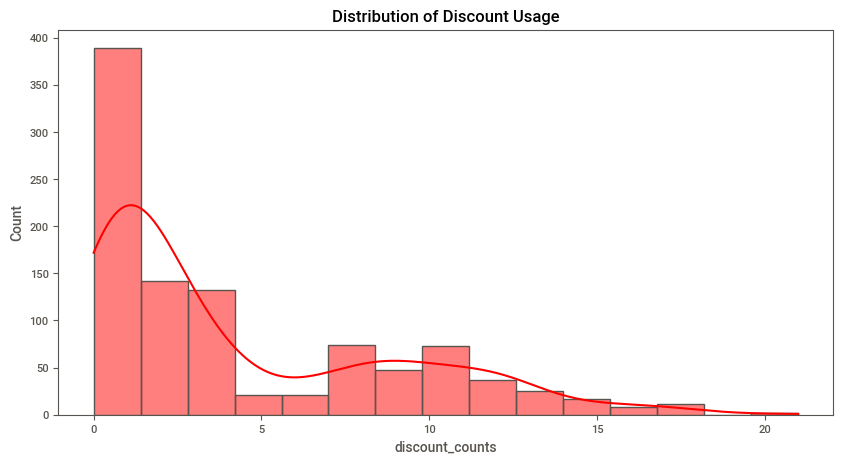

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['discount_counts'], kde=True, color='red')
plt.title("Distribution of Discount Usage")
plt.show()

## **Bivariate Analysis**

* total_purchases vs. avg_cart_value

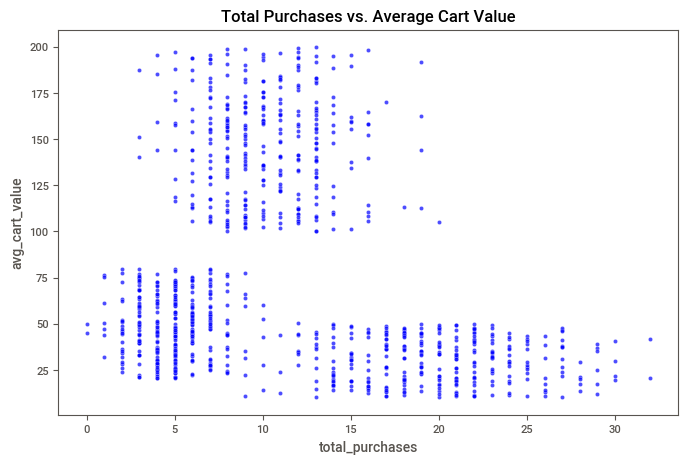

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['total_purchases'], y=df['avg_cart_value'], alpha=0.7, color='blue')
plt.title("Total Purchases vs. Average Cart Value")
plt.show()

* total_time_spent vs. total_purchases

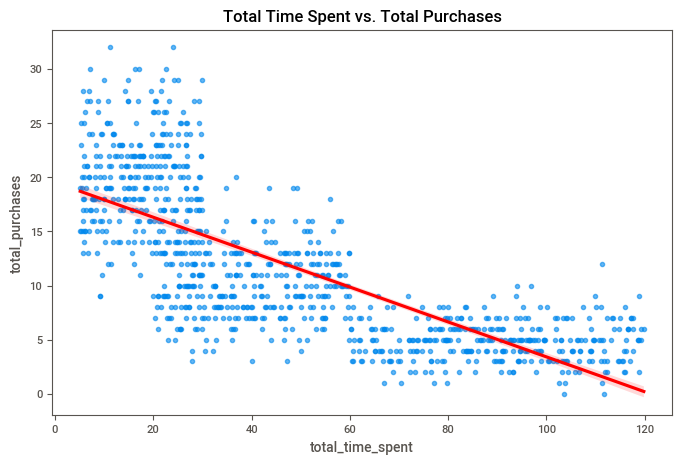

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df['total_time_spent'], y=df['total_purchases'], scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Total Time Spent vs. Total Purchases")
plt.show()

* product_click vs. total_purchases

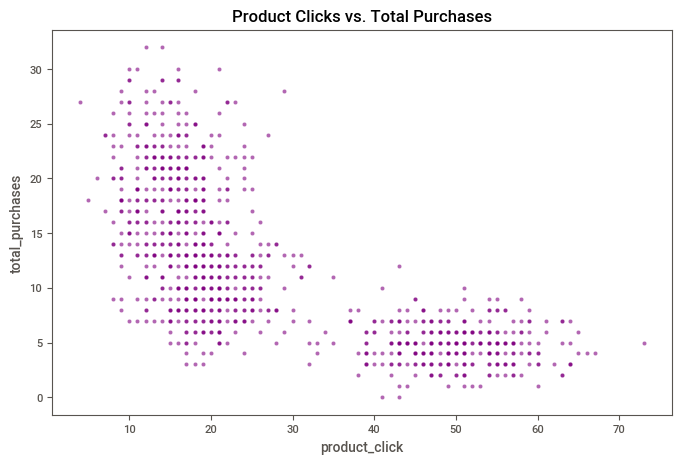

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['product_click'], y=df['total_purchases'], alpha=0.6, color='purple')
plt.title("Product Clicks vs. Total Purchases")
plt.show()

* discount_count vs. avg_cart_value

<ipython-input-74-a62efbeada4f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['discount_counts'], y=df['avg_cart_value'], palette='coolwarm')


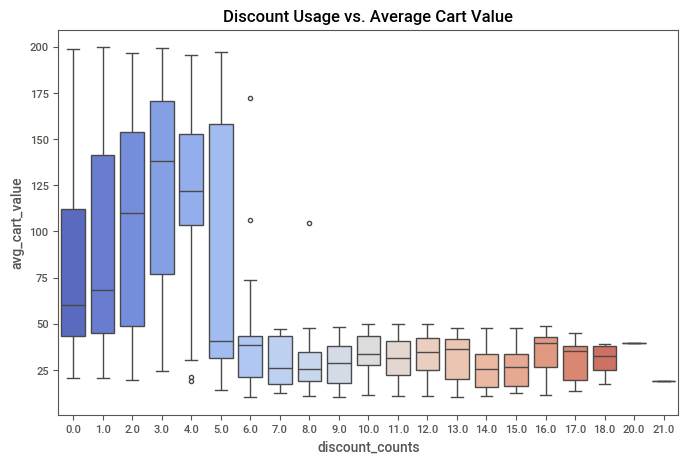

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['discount_counts'], y=df['avg_cart_value'], palette='coolwarm')
plt.title("Discount Usage vs. Average Cart Value")
plt.show()

* discount_count vs. total_purchases

<ipython-input-76-c69f7093f090>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['discount_counts'], y=df['total_purchases'], palette='coolwarm')


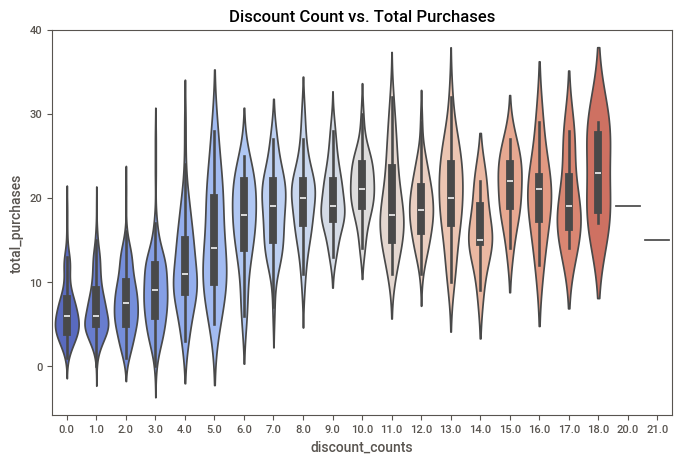

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['discount_counts'], y=df['total_purchases'], palette='coolwarm')
plt.title("Discount Count vs. Total Purchases")
plt.show()

## **Multi-variate Analysis**

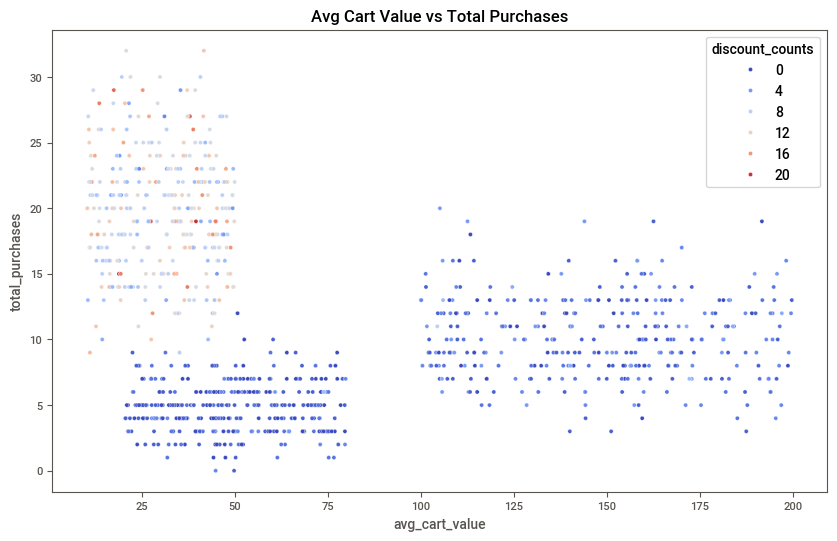

In [ ]:
# Multi-variate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['avg_cart_value'], y=df['total_purchases'], hue=df['discount_counts'], palette='coolwarm')
plt.title("Avg Cart Value vs Total Purchases")
plt.show()

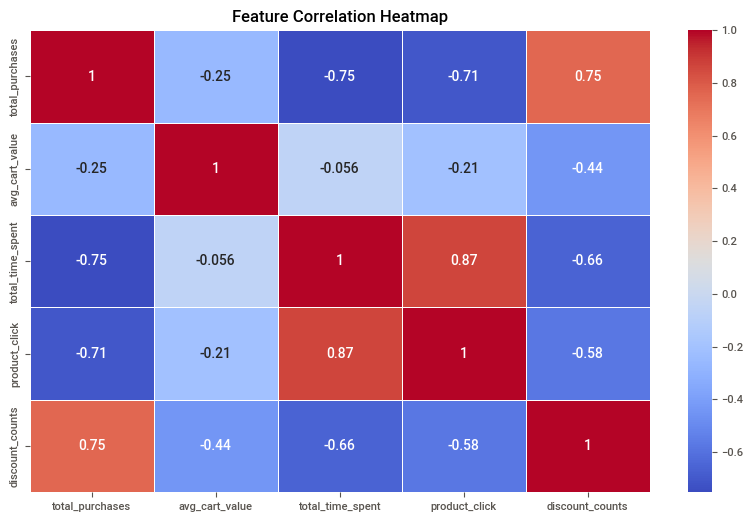

In [ ]:
# Correlation Matrix
new_df= df.copy()
new_df = new_df.drop('customer_id', axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### **Handling Null values**

In [40]:
# Remove null values from the data frame
df_2 = df.copy()
df_2.dropna(inplace=True)

In [41]:
df_2.info()
df_2.shape

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  979 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   979 non-null    float64
 5   customer_id       979 non-null    object 
dtypes: float64(5), object(1)
memory usage: 53.5+ KB


(979, 6)

## **Feature Scalling**

In [36]:
# # Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_2.drop('customer_id', axis=1))

# # Apply PCA for dimensionality reduction
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(scaled_data)

# model = KMeans(n_clusters=3, random_state=42, n_init=10)
# model.fit(pca_data)

# # Visualize the clusters
# plt.figure(figsize=(10, 6))
# plt.scatter(pca_data[:, 0], pca_data[:, 1], c=model.labels_, cmap='viridis', edgecolor='k')
# plt.title("Customer Clustering")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()

In [42]:
# Selecting relevant features
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_2[features])

## **K-Means Clustering**

In [43]:
# Applying K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_2['cluster'] = kmeans.fit_predict(df_scaled)

In [44]:
df_2.groupby('cluster')[features].mean()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
cluster,,,,,
0,10.175385,147.327169,40.284369,19.895385,1.972308
1,4.862805,49.029848,90.114726,49.716463,1.030488
2,19.711656,30.399509,17.453988,14.944785,9.938650


In [45]:
# Rename clusters based on observed behavior
cluster_mapping = {0: "High Spenders", 1: "Window Shoppers", 2: "Bargain Hunters"}
df_2['segment'] = df_2['cluster'].map(cluster_mapping)

Pairplot

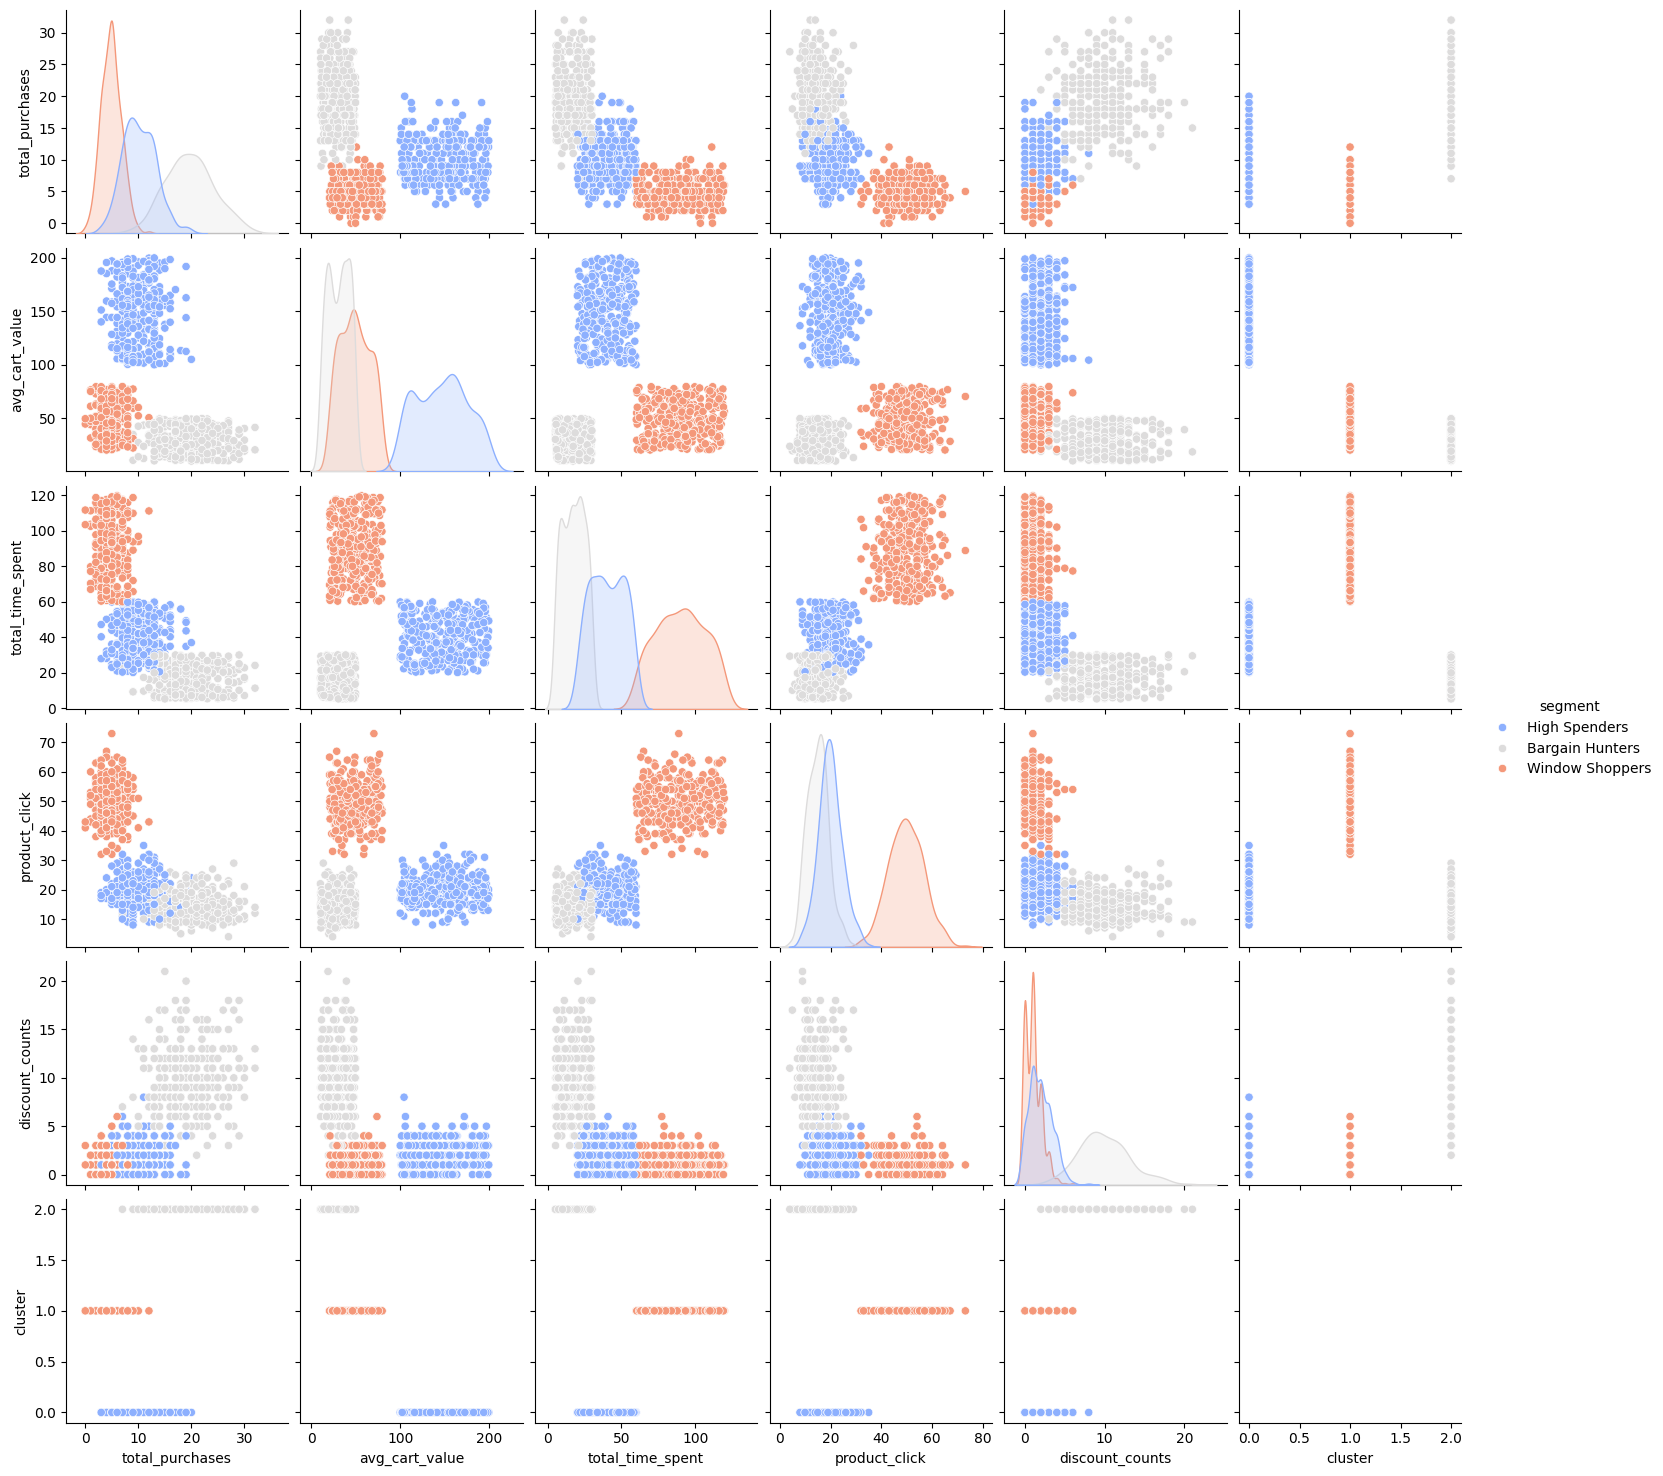

In [46]:
sns.pairplot(df_2, hue='segment', diag_kind='kde', palette='coolwarm')
plt.show()

## **Reduce to 2 principal components**

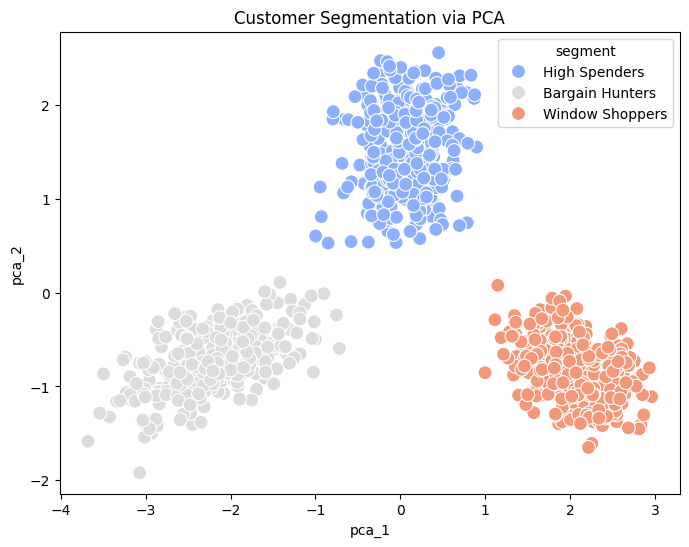

In [47]:
# Reduce to 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Add to dataframe
df_2['pca_1'] = pca_result[:, 0]
df_2['pca_2'] = pca_result[:, 1]

# Plot Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_2['pca_1'], y=df_2['pca_2'], hue=df_2['segment'], palette='coolwarm', s=100)
plt.title("Customer Segmentation via PCA")
plt.show()

In [52]:
import pandas as pd
import numpy as np
# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Feature importance based on absolute values of PCA components
feature_importance = np.abs(pca.components_)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame(feature_importance, columns=features)

# Print the feature importance for each PCA component
print("Feature Importance for each PCA Component:")
print(feature_importance_df)

# Explained variance ratio for each principal component
print("\nExplained Variance Ratio:")
explained_variance_ratio


Feature Importance for each PCA Component:
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0         0.511140        0.096784          0.511534       0.486923   
1         0.104855        0.842022          0.222511       0.358552   

   discount_counts  
0         0.480217  
1         0.319270  

Explained Variance Ratio:


array([0.6372403 , 0.26078061])

## **DBSCAN**

In [48]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)  # Adjust parameters
df_2['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

# Count customers in each DBSCAN cluster
df_2['dbscan_cluster'].value_counts()

# Analyze cluster profiles
df_2.groupby('dbscan_cluster')[features].mean()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
dbscan_cluster,,,,,
0,11.570991,75.457978,49.376966,28.237998,4.309499


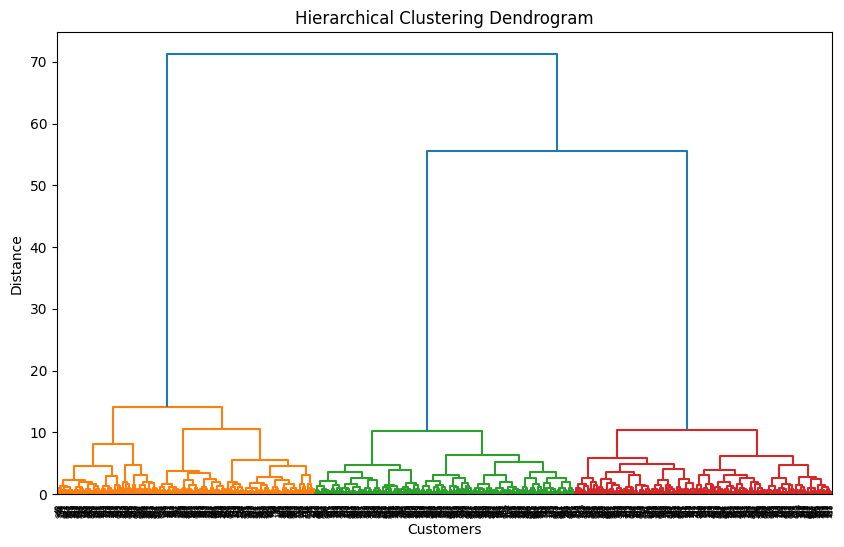

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

## **Hierarchical Clustering**

In [49]:
# Using 3 clusters (based on dendrogram)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_2['hierarchical_cluster'] = hierarchical.fit_predict(df_scaled)

# Analyze cluster profiles
df_2.groupby('hierarchical_cluster')[features].mean()


,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
hierarchical_cluster,,,,,
0,19.711656,30.399509,17.453988,14.944785,9.938650
1,10.175385,147.327169,40.284369,19.895385,1.972308
2,4.862805,49.029848,90.114726,49.716463,1.030488


## **Gaussian Mixture Models (GMM)**

In [50]:
gmm = GaussianMixture(n_components=3, random_state=42)
df_2['gmm_cluster'] = gmm.fit_predict(df_scaled)

# Probability of each customer belonging to a cluster
df_2[['gmm_prob_0', 'gmm_prob_1', 'gmm_prob_2']] = gmm.predict_proba(df_scaled)

# Analyze cluster distribution
df_2.groupby('gmm_cluster')[features].mean()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
gmm_cluster,,,,,
0,10.175385,147.327169,40.284369,19.895385,1.972308
1,4.862805,49.029848,90.114726,49.716463,1.030488
2,19.711656,30.399509,17.453988,14.944785,9.938650


**Intepreting Results**

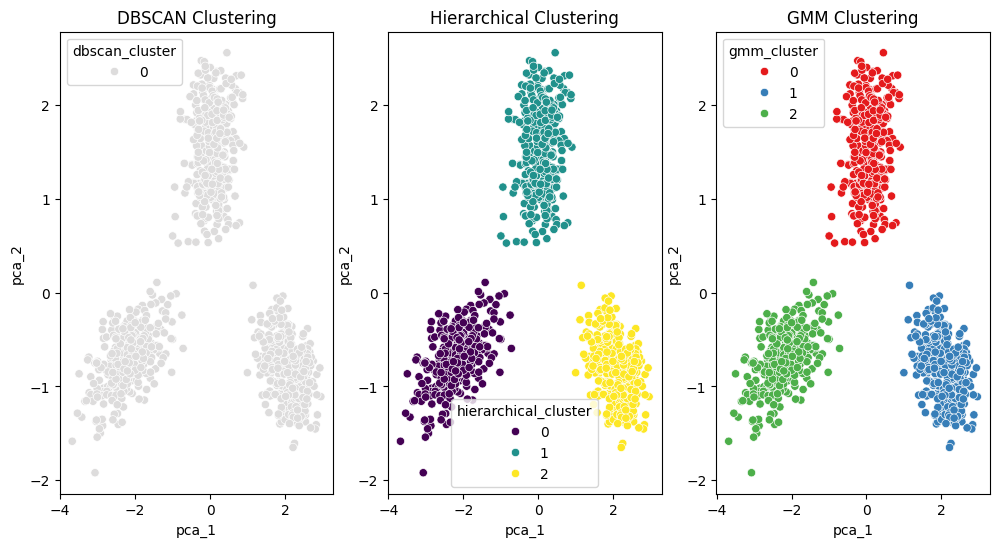

In [51]:
plt.figure(figsize=(12, 6))

# DBSCAN
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_2['pca_1'], y=df_2['pca_2'], hue=df_2['dbscan_cluster'], palette='coolwarm')
plt.title("DBSCAN Clustering")

# Hierarchical
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_2['pca_1'], y=df_2['pca_2'], hue=df_2['hierarchical_cluster'], palette='viridis')
plt.title("Hierarchical Clustering")

# GMM
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_2['pca_1'], y=df_2['pca_2'], hue=df_2['gmm_cluster'], palette='Set1')
plt.title("GMM Clustering")

plt.show()

## **Model Evaluation**

In [ ]:
# Compute Silhouette Scores
kmeans_silhouette = silhouette_score(df_scaled, df_2['cluster'])
dbscan_silhouette = silhouette_score(df_scaled, df_2['dbscan_cluster']) if len(set(df_2['dbscan_cluster'])) > 1 else -1
hierarchical_silhouette = silhouette_score(df_scaled, df_2['hierarchical_cluster'])
gmm_silhouette = silhouette_score(df_scaled, df_2['gmm_cluster'])

print(f"Silhouette Scores:")
print(f"K-Means: {kmeans_silhouette}")
print(f"DBSCAN: {dbscan_silhouette}")
print(f"Hierarchical: {hierarchical_silhouette}")
print(f"GMM: {gmm_silhouette}")


Silhouette Scores:
K-Means: 0.6260176986578468
DBSCAN: -1
Hierarchical: 0.6260176986578468
GMM: 0.6260176986578468


In [ ]:
# Compute Davies-Bouldin Index
kmeans_db = davies_bouldin_score(df_scaled, df_2['cluster'])
hierarchical_db = davies_bouldin_score(df_scaled, df_2['hierarchical_cluster'])
gmm_db = davies_bouldin_score(df_scaled, df_2['gmm_cluster'])

print(f"Davies-Bouldin Index:")
print(f"K-Means: {kmeans_db}")
print(f"Hierarchical: {hierarchical_db}")
print(f"GMM: {gmm_db}")

Davies-Bouldin Index:
K-Means: 0.5499863872687267
Hierarchical: 0.5499863872687267
GMM: 0.5499863872687267


In [ ]:
# Compute Calinski-Harabasz Score
kmeans_ch = calinski_harabasz_score(df_scaled, df_2['cluster'])
hierarchical_ch = calinski_harabasz_score(df_scaled, df_2['hierarchical_cluster'])
gmm_ch = calinski_harabasz_score(df_scaled, df_2['gmm_cluster'])

print(f"Calinski-Harabasz Score:")
print(f"K-Means: {kmeans_ch}")
print(f"Hierarchical: {hierarchical_ch}")
print(f"GMM: {gmm_ch}")

Calinski-Harabasz Score:
K-Means: 2452.1160447863213
Hierarchical: 2452.116044786321
GMM: 2452.1160447863213


## **Feature Engineering**

* Customer Spend Efficiency: Measures how much a customer spends per product click.

In [ ]:
df_2['spend_per_click'] = df_2['avg_cart_value'] / (df_2['product_click'] + 1)  # Avoid division by zero

* Purchase Conversion Rate: How often views turn into purchases.

In [ ]:
df_2['purchase_conversion_rate'] = df_2['total_purchases'] / (df_2['product_click'] + 1)

* Discount Dependency Ratio: Measures if customers buy only when discounts are available.

In [ ]:
df_2['discount_usage_rate'] = df_2['discount_count'] / (df_2['total_purchases'] + 1)